C:\Users\surve\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():


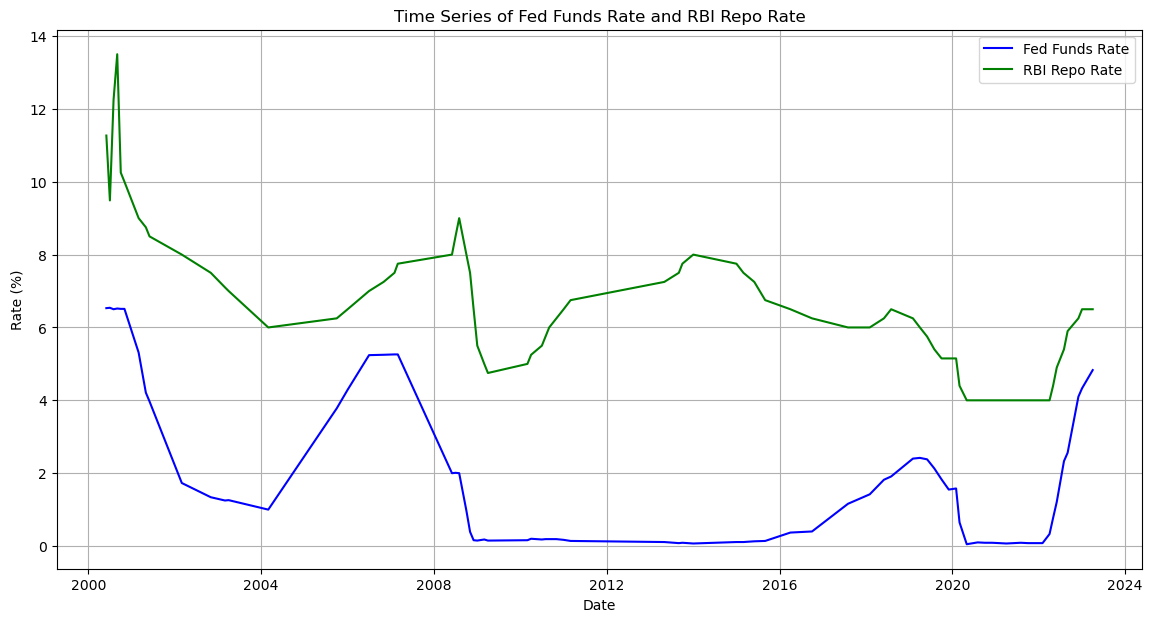

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'C:/Users/surve/OneDrive/Desktop/realtime research Analysis docs/Correlation FEDFUNDS vs RBI REPORATES Review Paper.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheet
df = pd.read_excel(file_path, sheet_name='Correlation - FEDFUNDS RBIRATES')

# Extract the relevant columns
time_series_data = df[['DATE', 'FEDFUNDS', 'RBI RATES']].dropna()

# Convert DATE column to datetime
time_series_data['DATE'] = pd.to_datetime(time_series_data['DATE'])

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(time_series_data['DATE'], time_series_data['FEDFUNDS'], label='Fed Funds Rate', color='blue')
plt.plot(time_series_data['DATE'], time_series_data['RBI RATES'], label='RBI Repo Rate', color='green')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('Time Series of Fed Funds Rate and RBI Repo Rate')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\surve\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():


Coefficient of Correlation (r): 0.6824512922308724
Covariance: 2.801472487512488
Variance (Fed Funds Rate): 4.392885114885114
Variance (RBI Repo Rate): 3.8360084668664665
Beta (slope): 0.6377295135763537
Alpha (intercept): 5.364848487480967
Standard Error: 0.07834918523751774
p-value: 5.9493265909120915e-12


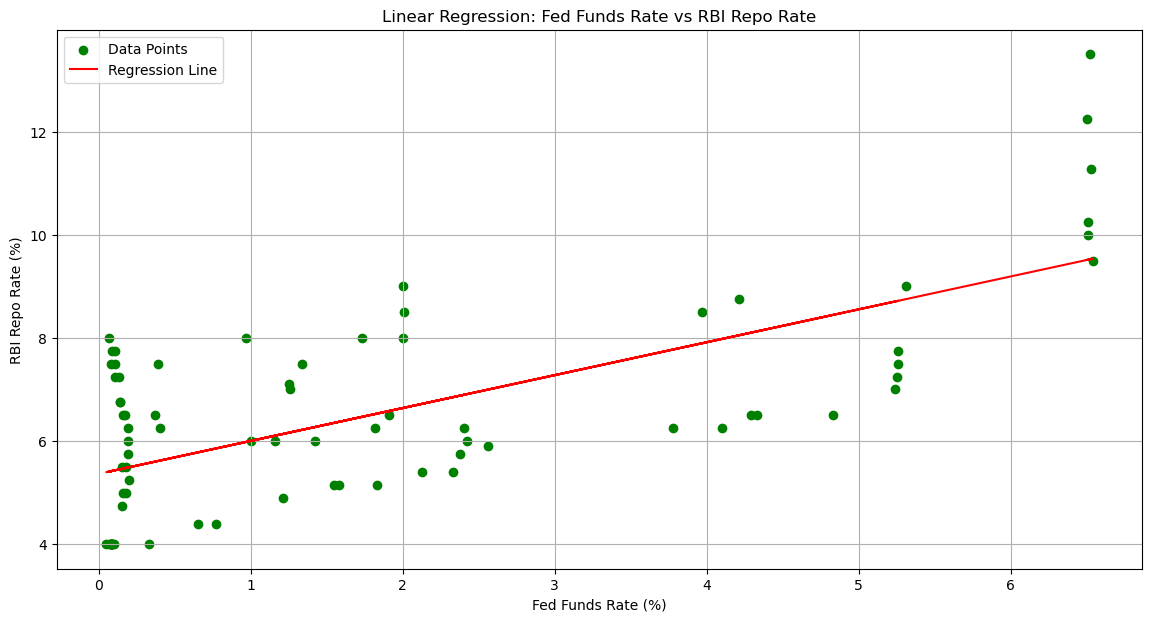

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the Excel file
file_path = 'C:/Users/surve/OneDrive/Desktop/realtime research Analysis docs/Correlation FEDFUNDS vs RBI REPORATES Review Paper.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheet
df = pd.read_excel(file_path, sheet_name='Correlation - FEDFUNDS RBIRATES')

# Extract the relevant columns
time_series_data = df[['DATE', 'FEDFUNDS', 'RBI RATES']].dropna()

# Convert DATE column to datetime
time_series_data['DATE'] = pd.to_datetime(time_series_data['DATE'])

# Perform linear regression
x = time_series_data['FEDFUNDS']
y = time_series_data['RBI RATES']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate additional statistics
covariance = np.cov(x, y)[0, 1]
variance_x = np.var(x, ddof=1)
variance_y = np.var(y, ddof=1)
beta = slope
alpha = intercept

# Print the statistics
print(f"Coefficient of Correlation (r): {r_value}")
print(f"Covariance: {covariance}")
print(f"Variance (Fed Funds Rate): {variance_x}")
print(f"Variance (RBI Repo Rate): {variance_y}")
print(f"Beta (slope): {beta}")
print(f"Alpha (intercept): {alpha}")
print(f"Standard Error: {std_err}")
print(f"p-value: {p_value}")

# Plot the regression line
plt.figure(figsize=(14, 7))
plt.scatter(x, y, label='Data Points', color='green')
plt.plot(x, intercept + slope * x, label='Regression Line', color='red')
plt.xlabel('Fed Funds Rate (%)')
plt.ylabel('RBI Repo Rate (%)')
plt.title('Linear Regression: Fed Funds Rate vs RBI Repo Rate')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\surve\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():


Coefficient of Determination (R^2): 0.5114093859297066
Mean Squared Error (MSE): 1.8502090435281433
Covariance: 2.801472487512488
Variance (Fed Funds Rate): 4.392885114885114
Variance (RBI Repo Rate): 3.8360084668664673
Coefficients (beta): [ 0.         -0.04961581  0.11676114]
Intercept (alpha): 5.722513093810594


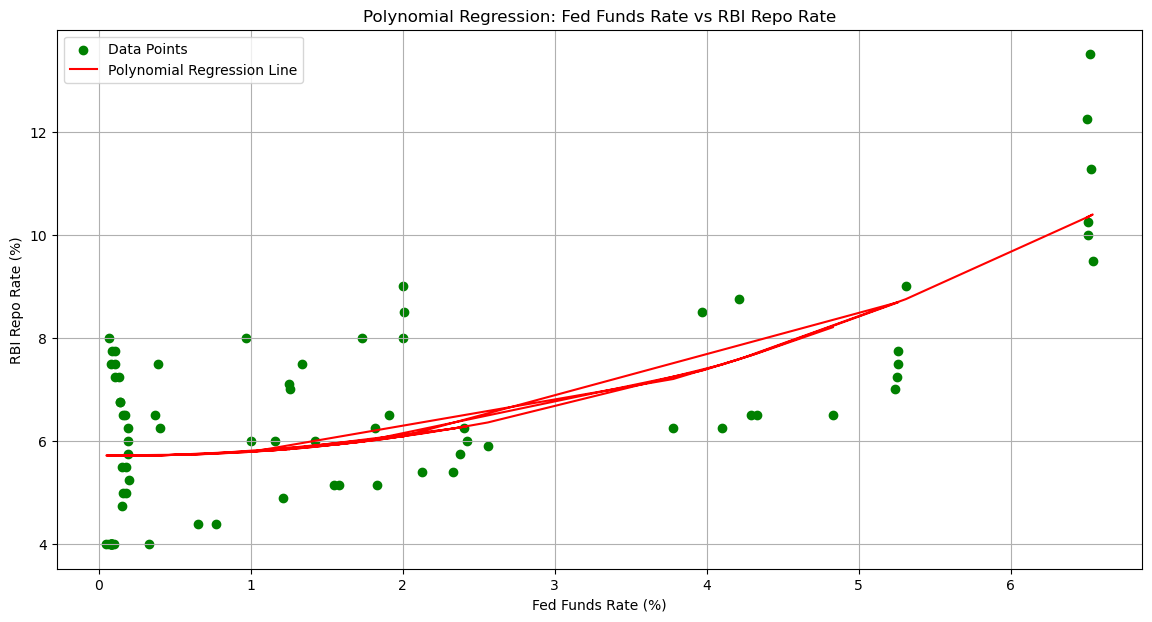

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Excel file
file_path = 'C:/Users/surve/OneDrive/Desktop/realtime research Analysis docs/Correlation FEDFUNDS vs RBI REPORATES Review Paper.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheet
df = pd.read_excel(file_path, sheet_name='Correlation - FEDFUNDS RBIRATES')

# Extract the relevant columns
time_series_data = df[['DATE', 'FEDFUNDS', 'RBI RATES']].dropna()

# Convert DATE column to datetime
time_series_data['DATE'] = pd.to_datetime(time_series_data['DATE'])

# Extract the independent and dependent variables
x = time_series_data['FEDFUNDS'].values.reshape(-1, 1)
y = time_series_data['RBI RATES'].values

# Perform polynomial regression
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)

# Predictions
y_poly_pred = poly_reg_model.predict(x_poly)

# Calculate statistics
r2 = r2_score(y, y_poly_pred)
mse = mean_squared_error(y, y_poly_pred)
coef = poly_reg_model.coef_
intercept = poly_reg_model.intercept_

# Calculate additional statistics
covariance = np.cov(time_series_data['FEDFUNDS'], y)[0, 1]
variance_x = np.var(time_series_data['FEDFUNDS'], ddof=1)
variance_y = np.var(y, ddof=1)
beta = coef[1]  # Coefficient for the linear term
alpha = intercept

# Print the statistics
print(f"Coefficient of Determination (R^2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Covariance: {covariance}")
print(f"Variance (Fed Funds Rate): {variance_x}")
print(f"Variance (RBI Repo Rate): {variance_y}")
print(f"Coefficients (beta): {coef}")
print(f"Intercept (alpha): {alpha}")

# Plot the polynomial regression line
plt.figure(figsize=(14, 7))
plt.scatter(x, y, label='Data Points', color='green')
plt.plot(x, y_poly_pred, label='Polynomial Regression Line', color='red')
plt.xlabel('Fed Funds Rate (%)')
plt.ylabel('RBI Repo Rate (%)')
plt.title('Polynomial Regression: Fed Funds Rate vs RBI Repo Rate')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\surve\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0296
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0176
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0224
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0188
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0236
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0197
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0128
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0205
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0207


C:\Users\surve\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 953ms/stepWARNING:tensorflow:6 out of the last 7 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000015F3FD66E80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


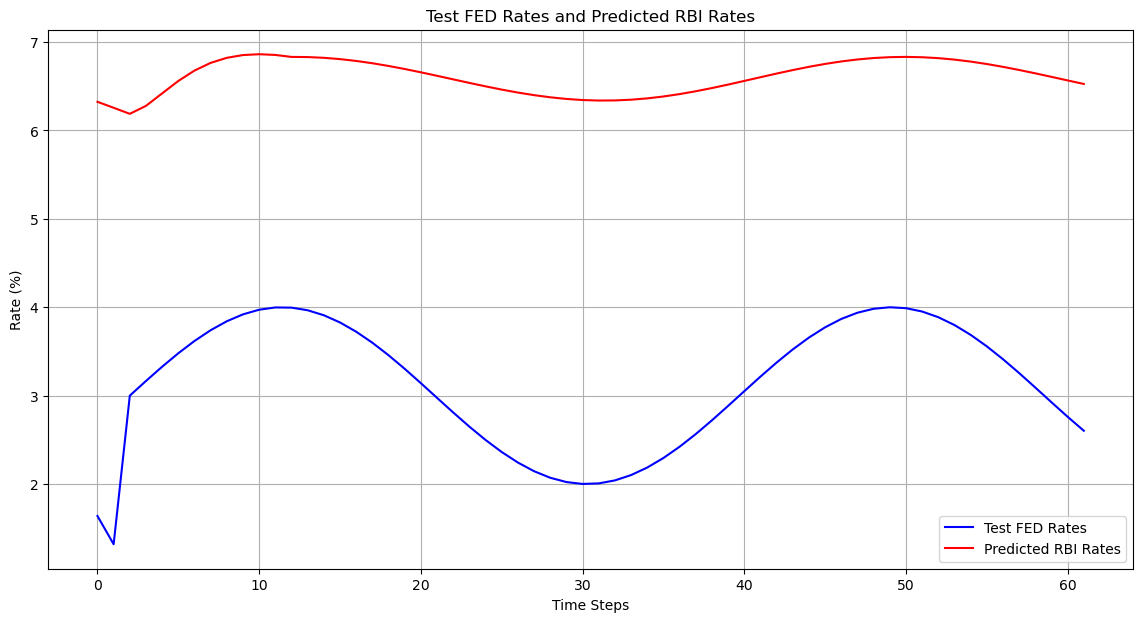

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the Excel file
file_path =  'C:/Users/surve/OneDrive/Desktop/realtime research Analysis docs/Correlation FEDFUNDS vs RBI REPORATES Review Paper.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheet
df = pd.read_excel(file_path, sheet_name='Correlation - FEDFUNDS RBIRATES')

# Extract the relevant columns
time_series_data = df[['DATE', 'FEDFUNDS', 'RBI RATES']].dropna()

# Convert DATE column to datetime
time_series_data['DATE'] = pd.to_datetime(time_series_data['DATE'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(time_series_data[['FEDFUNDS', 'RBI RATES']])

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 1])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(data_scaled, time_step)

# Reshape the input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=10)

# Generate test data for prediction
test_data_length = 72  # 6 years (1 year of slow decrease + 5 years of oscillation)
fed_rates_test = []

# Slowly decrease the FED rate to 1 within 1 year
for i in range(12):
    fed_rates_test.append(max(1, 4.83 - 3.83 * (i / 12)))  # Assuming the latest FED rate is 4.83

# Oscillate around 1-3 for the next 5 years
for i in range(60):
    fed_rates_test.append(2 + np.sin(i / 6) + 1)  # Oscillate between 1 and 3

fed_rates_test = np.array(fed_rates_test).reshape(-1, 1)
fed_rates_test_scaled = scaler.transform(np.hstack([fed_rates_test, fed_rates_test]))[:, 0].reshape(-1, 1)

# Prepare the test data for LSTM
X_test_predict = []
for i in range(time_step, len(fed_rates_test_scaled)):
    X_test_predict.append(fed_rates_test_scaled[i-time_step:i, 0])

X_test_predict = np.array(X_test_predict)
X_test_predict = X_test_predict.reshape(X_test_predict.shape[0], X_test_predict.shape[1], 1)

# Predict the RBI rates using the LSTM model
predicted_rbi_rates_scaled = model.predict(X_test_predict)

# Inverse transform the predicted RBI rates to original scale
predicted_rbi_rates = scaler.inverse_transform(np.hstack([fed_rates_test[time_step:], predicted_rbi_rates_scaled]))[:, 1]

# Plot the test data and predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(fed_rates_test[time_step:])), fed_rates_test[time_step:], label='Test FED Rates', color='blue')
plt.plot(range(len(predicted_rbi_rates)), predicted_rbi_rates, label='Predicted RBI Rates', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Rate (%)')
plt.title('Test FED Rates and Predicted RBI Rates')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10


C:\Users\surve\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0399
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0259
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0207
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0193
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0203
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196


C:\Users\surve\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


C:\Users\surve\AppData\Local\Temp\ipykernel_5492\3010668755.py:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_dates = pd.date_range(start_date, periods=test_data_length, freq='M')


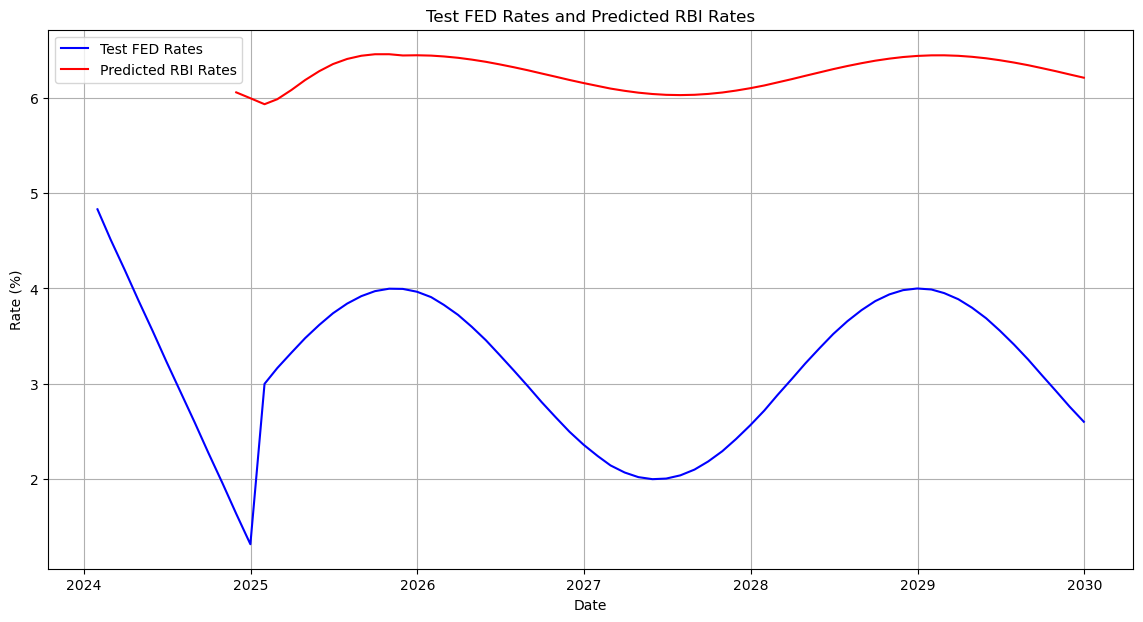

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime

# Load the Excel file
file_path =  'C:/Users/surve/OneDrive/Desktop/realtime research Analysis docs/Correlation FEDFUNDS vs RBI REPORATES Review Paper.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheet
df = pd.read_excel(file_path, sheet_name='Correlation - FEDFUNDS RBIRATES')

# Extract the relevant columns
time_series_data = df[['DATE', 'FEDFUNDS', 'RBI RATES']].dropna()

# Convert DATE column to datetime
time_series_data['DATE'] = pd.to_datetime(time_series_data['DATE'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(time_series_data[['FEDFUNDS', 'RBI RATES']])

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 1])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(data_scaled, time_step)

# Reshape the input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=10)

# Generate test data for prediction
test_data_length = 72  # 6 years (1 year of slow decrease + 5 years of oscillation)
fed_rates_test = []

# Slowly decrease the FED rate to 1 within 1 year
for i in range(12):
    fed_rates_test.append(max(1, 4.83 - 3.83 * (i / 12)))  # Assuming the latest FED rate is 4.83

# Oscillate around 1-3 for the next 5 years
for i in range(60):
    fed_rates_test.append(2 + np.sin(i / 6) + 1)  # Oscillate between 1 and 3

fed_rates_test = np.array(fed_rates_test).reshape(-1, 1)
fed_rates_test_scaled = scaler.transform(np.hstack([fed_rates_test, fed_rates_test]))[:, 0].reshape(-1, 1)

# Prepare the test data for LSTM
X_test_predict = []
for i in range(time_step, len(fed_rates_test_scaled)):
    X_test_predict.append(fed_rates_test_scaled[i-time_step:i, 0])

X_test_predict = np.array(X_test_predict)
X_test_predict = X_test_predict.reshape(X_test_predict.shape[0], X_test_predict.shape[1], 1)

# Predict the RBI rates using the LSTM model
predicted_rbi_rates_scaled = model.predict(X_test_predict)

# Inverse transform the predicted RBI rates to original scale
predicted_rbi_rates = scaler.inverse_transform(np.hstack([fed_rates_test[time_step:], predicted_rbi_rates_scaled]))[:, 1]

# Generate the date range for the test data
start_date = datetime.datetime(2024, 1, 1)
test_dates = pd.date_range(start_date, periods=test_data_length, freq='M')

# Plot the test data and predictions
plt.figure(figsize=(14, 7))
plt.plot(test_dates, fed_rates_test, label='Test FED Rates', color='blue')
plt.plot(test_dates[time_step:], predicted_rbi_rates, label='Predicted RBI Rates', color='red')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('Test FED Rates and Predicted RBI Rates')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10


C:\Users\surve\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0338
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162


C:\Users\surve\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step


C:\Users\surve\AppData\Local\Temp\ipykernel_5492\3196950155.py:91: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_dates = pd.date_range(start_date, periods=len(fed_rates_test), freq='M')


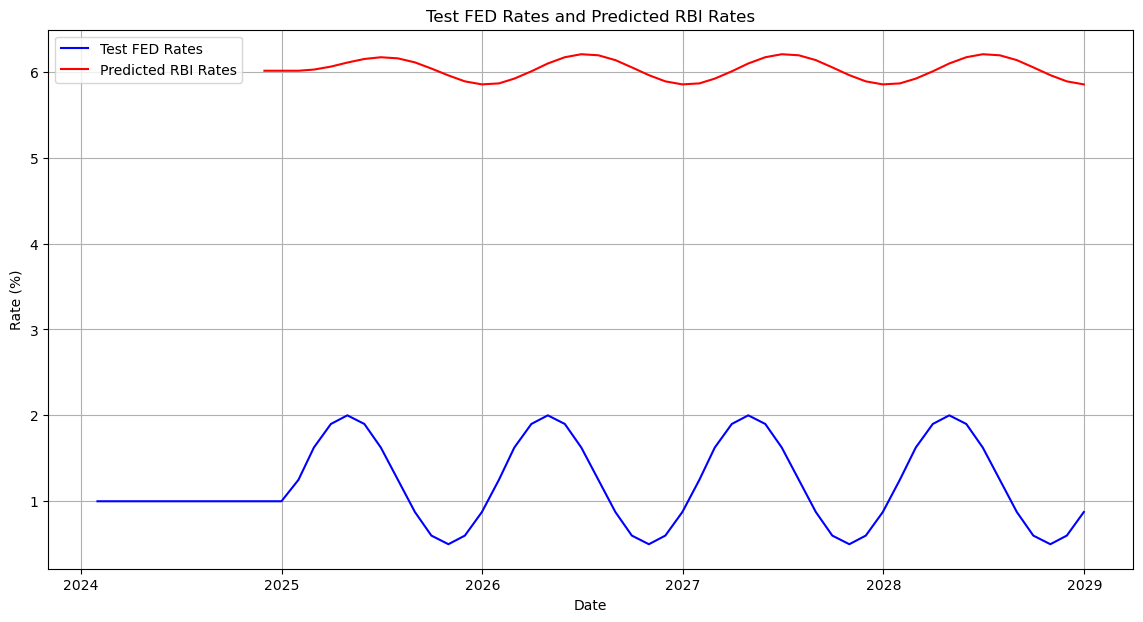

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime

# Load the Excel file
file_path =  'C:/Users/surve/OneDrive/Desktop/realtime research Analysis docs/Correlation FEDFUNDS vs RBI REPORATES Review Paper.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheet
df = pd.read_excel(file_path, sheet_name='Correlation - FEDFUNDS RBIRATES')

# Extract the relevant columns
time_series_data = df[['DATE', 'FEDFUNDS', 'RBI RATES']].dropna()

# Convert DATE column to datetime
time_series_data['DATE'] = pd.to_datetime(time_series_data['DATE'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(time_series_data[['FEDFUNDS', 'RBI RATES']])

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 1])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(data_scaled, time_step)

# Reshape the input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=10)

# Generate new test data for prediction
test_data_length = 72  # 6 years (1 year of slow decrease + 5 years of oscillation)
fed_rates_test = []

# Drop to 1% for 2024-2025
for i in range(12):
    fed_rates_test.append(1)

# Oscillate between 0.5% and 2% for the next 4 years
oscillation_period = 48  # 4 years
for i in range(oscillation_period):
    fed_rates_test.append(1.25 + 0.75 * np.sin(2 * np.pi * i / 12))  # Oscillate between 0.5 and 2

fed_rates_test = np.array(fed_rates_test).reshape(-1, 1)
fed_rates_test_scaled = scaler.transform(np.hstack([fed_rates_test, fed_rates_test]))[:, 0].reshape(-1, 1)

# Prepare the test data for LSTM
X_test_predict = []
for i in range(time_step, len(fed_rates_test_scaled)):
    X_test_predict.append(fed_rates_test_scaled[i-time_step:i, 0])

X_test_predict = np.array(X_test_predict)
X_test_predict = X_test_predict.reshape(X_test_predict.shape[0], X_test_predict.shape[1], 1)

# Predict the RBI rates using the LSTM model
predicted_rbi_rates_scaled = model.predict(X_test_predict)

# Inverse transform the predicted RBI rates to original scale
predicted_rbi_rates = scaler.inverse_transform(np.hstack([fed_rates_test[time_step:], predicted_rbi_rates_scaled]))[:, 1]

# Generate the date range for the test data
start_date = datetime.datetime(2024, 1, 1)
test_dates = pd.date_range(start_date, periods=len(fed_rates_test), freq='M')

# Plot the test data and predictions
plt.figure(figsize=(14, 7))
plt.plot(test_dates, fed_rates_test, label='Test FED Rates', color='blue')
plt.plot(test_dates[time_step:], predicted_rbi_rates, label='Predicted RBI Rates', color='red')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('Test FED Rates and Predicted RBI Rates')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\surve\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Web Extension extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0324
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0246
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0217
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0232
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0195
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0200
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220


C:\Users\surve\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step


C:\Users\surve\AppData\Local\Temp\ipykernel_10952\2103031282.py:87: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_dates = pd.date_range(start_date, periods=len(fed_rates_test), freq='M')


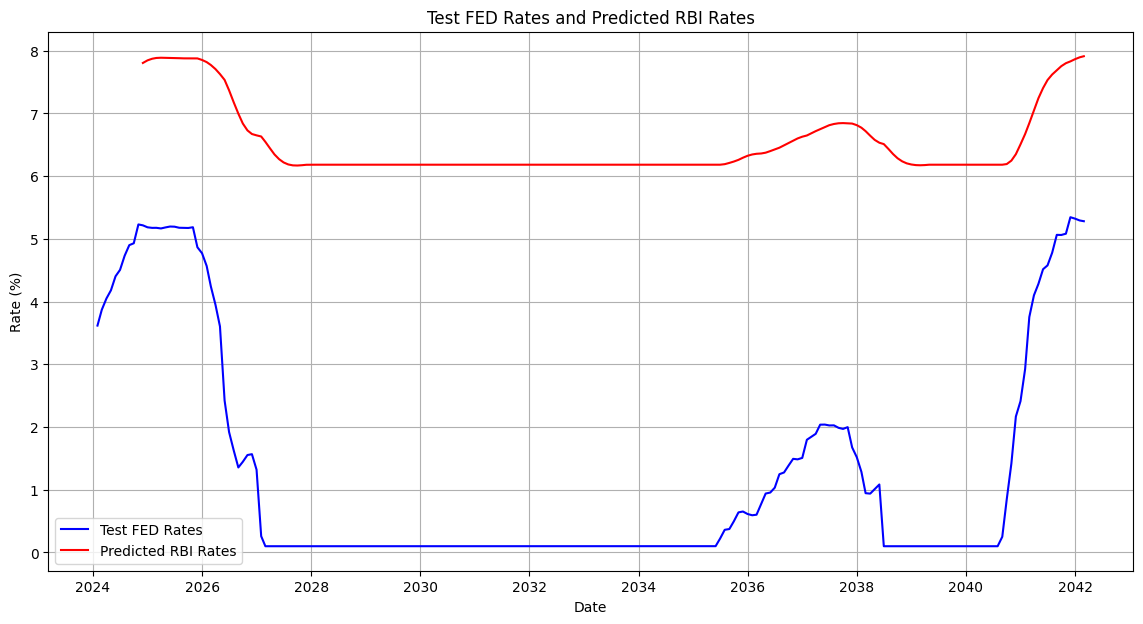

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import datetime

# Load the test data from the CSV file
test_file_path = 'C:/Users/surve/OneDrive/Desktop/realtime research Analysis docs/test_predictions.csv'
test_data = pd.read_csv(test_file_path)

# Convert the 'Date' column to datetime format
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Extract the FED rates from the test data
fed_rates_test = test_data['Federal Funds Rate Predictions'].values.reshape(-1, 1)

# Load the Excel file
file_path = 'C:/Users/surve/OneDrive/Desktop/realtime research Analysis docs/Correlation FEDFUNDS vs RBI REPORATES Review Paper.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheet
df = pd.read_excel(file_path, sheet_name='Correlation - FEDFUNDS RBIRATES')

# Extract the relevant columns
time_series_data = df[['DATE', 'FEDFUNDS', 'RBI RATES']].dropna()

# Convert DATE column to datetime
time_series_data['DATE'] = pd.to_datetime(time_series_data['DATE'])

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(time_series_data[['FEDFUNDS', 'RBI RATES']])

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 1])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(data_scaled, time_step)

# Reshape the input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=10)

# Normalize the test fed rates
fed_rates_test_scaled = scaler.transform(np.hstack([fed_rates_test, fed_rates_test]))[:, 0].reshape(-1, 1)

# Prepare the test data for LSTM
X_test_predict = []
for i in range(time_step, len(fed_rates_test_scaled)):
    X_test_predict.append(fed_rates_test_scaled[i-time_step:i, 0])

X_test_predict = np.array(X_test_predict)
X_test_predict = X_test_predict.reshape(X_test_predict.shape[0], X_test_predict.shape[1], 1)

# Predict the RBI rates using the LSTM model
predicted_rbi_rates_scaled = model.predict(X_test_predict)

# Inverse transform the predicted RBI rates to original scale
predicted_rbi_rates = scaler.inverse_transform(np.hstack([fed_rates_test[time_step:], predicted_rbi_rates_scaled]))[:, 1]

# Generate the date range for the test data
start_date = datetime.datetime(2024, 1, 1)
test_dates = pd.date_range(start_date, periods=len(fed_rates_test), freq='M')

# Plot the test data and predictions
plt.figure(figsize=(14, 7))
plt.plot(test_dates, fed_rates_test, label='Test FED Rates', color='blue')
plt.plot(test_dates[time_step:], predicted_rbi_rates, label='Predicted RBI Rates', color='red')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title('Test FED Rates and Predicted RBI Rates')
plt.legend()
plt.grid(True)
plt.show()


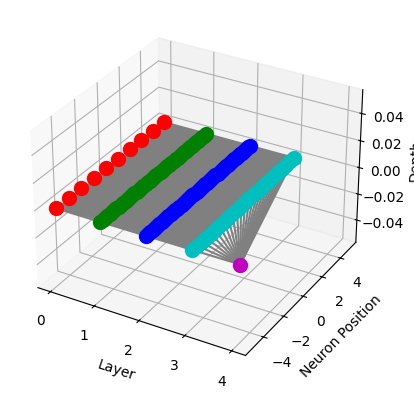

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_neural_network():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the network architecture
    layers = [ 10, 50, 50, 25, 1]
    colors = [ 'r', 'g', 'b', 'c', 'm']

    # Positions of neurons in each layer
    layer_positions = [np.linspace(-5, 5, num) for num in layers]

    # Draw neurons
    for i, layer in enumerate(layer_positions):
        for j, pos in enumerate(layer):
            ax.scatter(i, pos, 0, color=colors[i], s=100)

    # Draw axons
    for i in range(len(layer_positions) - 1):
        for j, pos in enumerate(layer_positions[i]):
            for k, next_pos in enumerate(layer_positions[i + 1]):
                ax.plot([i, i + 1], [pos, next_pos], [0, 0], 'gray')

    ax.set_xlabel('Layer')
    ax.set_ylabel('Neuron Position')
    ax.set_zlabel('Depth')
    plt.show()

plot_neural_network()

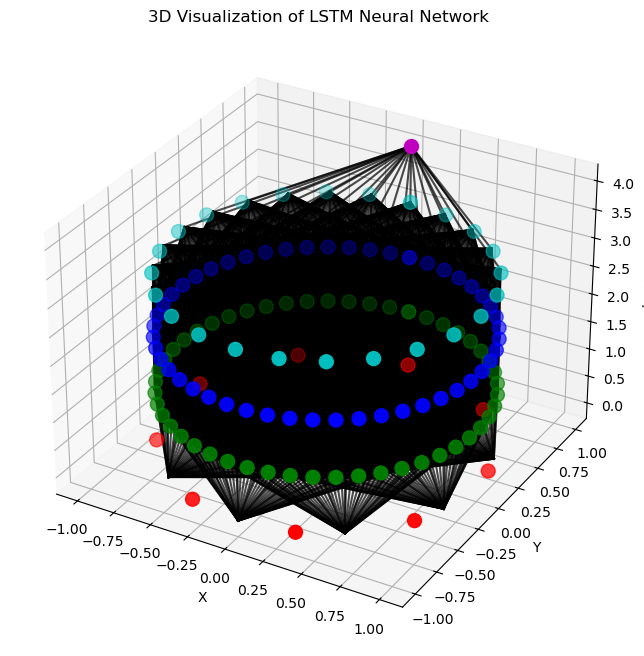

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the structure of the LSTM model
layers = ['Input (10, 1)', 'LSTM1 (50)', 'LSTM2 (50)', 'Dense (25)', 'Output (1)']
num_neurons = [10, 50, 50, 25, 1]  # Number of neurons per layer

# Initialize 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot neurons as spheres
neuron_radius = 0.1
neuron_colors = ['r', 'g', 'b', 'c', 'm']

for i, layer in enumerate(layers):
    layer_neurons = num_neurons[i]
    theta = np.linspace(0, 2 * np.pi, layer_neurons)
    z = i * np.ones(layer_neurons)
    x = np.sin(theta)
    y = np.cos(theta)
    ax.scatter(x, y, z, c=neuron_colors[i], s=100)

# Plot connections as lines
for i in range(len(layers) - 1):
    for j in range(num_neurons[i]):
        for k in range(num_neurons[i + 1]):
            ax.plot([np.sin(2 * np.pi * j / num_neurons[i]), np.sin(2 * np.pi * k / num_neurons[i + 1])],
                    [np.cos(2 * np.pi * j / num_neurons[i]), np.cos(2 * np.pi * k / num_neurons[i + 1])],
                    [i, i + 1], color='k', alpha=0.7)

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Layer')
ax.set_title('3D Visualization of LSTM Neural Network')

plt.show()


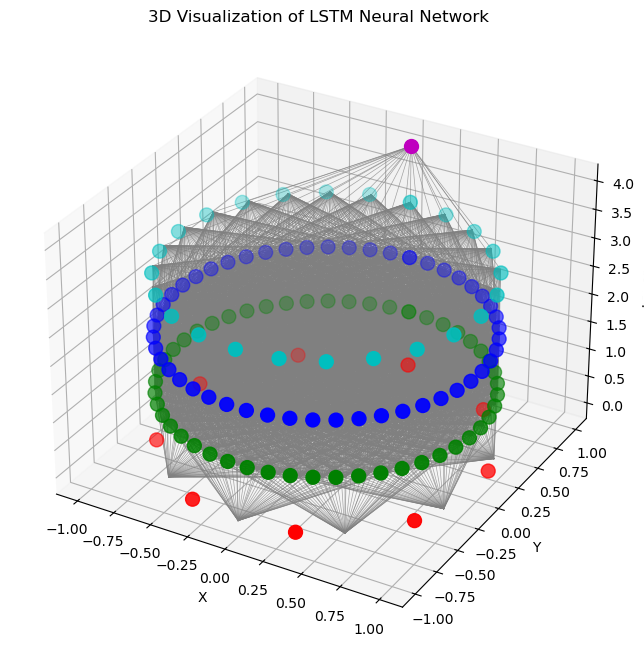

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Define the structure of the LSTM model
layers = ['Input (10, 1)', 'LSTM1 (50)', 'LSTM2 (50)', 'Dense (25)', 'Output (1)']
num_neurons = [10, 50, 50, 25, 1]  # Number of neurons per layer

# Initialize 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot neurons as spheres
neuron_radius = 0.1
neuron_colors = ['r', 'g', 'b', 'c', 'm']

for i, layer in enumerate(layers):
    layer_neurons = num_neurons[i]
    theta = np.linspace(0, 2 * np.pi, layer_neurons)
    z = i * np.ones(layer_neurons)
    x = np.sin(theta)
    y = np.cos(theta)
    ax.scatter(x, y, z, c=neuron_colors[i], s=100)

# Plot connections as lines (with adjusted color and linewidth)
for i in range(len(layers) - 1):
    for j in range(num_neurons[i]):
        for k in range(num_neurons[i + 1]):
            ax.plot([np.sin(2 * np.pi * j / num_neurons[i]), np.sin(2 * np.pi * k / num_neurons[i + 1])],
                    [np.cos(2 * np.pi * j / num_neurons[i]), np.cos(2 * np.pi * k / num_neurons[i + 1])],
                    [i, i + 1], color='grey', linewidth=0.5, alpha=0.7)

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Layer')
ax.set_title('3D Visualization of LSTM Neural Network')

plt.show()
